#### Cargamos Librerías

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
#from hypopt import GridSearch #para poder usar una muestra de validación y no CV
%matplotlib inline  
sns.set() #hace que los gráficos queden más bonitos


#### Funciones auxiliares

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

#### Cargamos los datos y creamos el target

In [3]:
[chr(x) for x in range(65, 91)] + [chr(x) for x in range(97, 100)]

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c']

In [4]:
col_names=[ "clase"] + [chr(x) for x in range(65, 91)] + [chr(x) for x in range(97, 101)]

In [5]:
col_names

['clase',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd']

In [6]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=col_names)

In [7]:
df.head()

,clase,A,B,C,D,E,F,G,H,I,...,U,V,W,X,Y,Z,a,b,c,d
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.shape

(569, 31)

In [9]:
df.clase.unique()

array(['M', 'B'], dtype=object)

In [10]:
df_X = df[ [chr(x) for x in range(65, 91)] + [chr(x) for x in range(97, 101)]]
df_y = df[['clase']]

In [11]:
df_X.head()

,A,B,C,D,E,F,G,H,I,J,...,U,V,W,X,Y,Z,a,b,c,d
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df_y.head()

,clase
842302,M
842517,M
84300903,M
84348301,M
84358402,M


In [13]:
df_y.clase = (df_y.clase=="M")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [14]:
df_y.describe()

,clase
count,569
unique,2
top,False
freq,357


#### Separamos las muestras en entrenamiento y test

In [15]:
X_train, X_test, y_train, y_test = train_test_split( df_X, df_y, test_size=0.25, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426, 1), (143, 1))

## Regresión Logística

In [17]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='liblinear',
                         multi_class='auto').fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Performace

In [18]:
 clf.score(X_test, y_test)

0.958041958041958

In [19]:
print(classification_report(y_test, clf.predict(X_test) ))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97        89
        True       0.96      0.93      0.94        54

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



### Matiz de Confusión

Confusion matrix, without normalization
[[87  2]
 [ 4 50]]
Normalized confusion matrix
[[0.97752809 0.02247191]
 [0.07407407 0.92592593]]


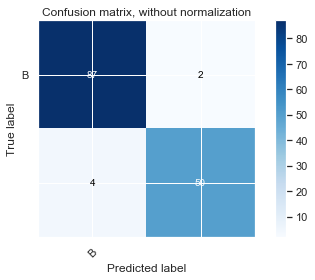

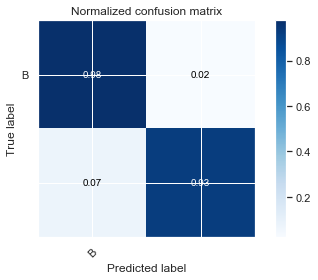

In [20]:
class_names = df['clase'].unique()
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, clf.predict(X_test), classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, clf.predict(X_test), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

### ROC

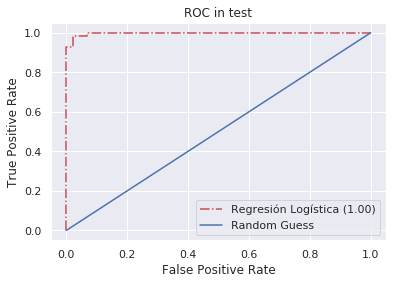

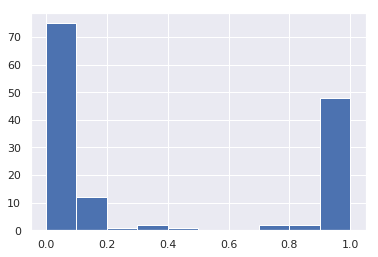

In [21]:
#y_pred_proba = LR_model.predict(X_test_sc)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test) [:,1])

fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'Regresión Logística (%2.2f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC in test')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend()
plt.show()

plt.hist(clf.predict_proba(X_test)[:,1])
plt.show()

## SVM

In [21]:
from sklearn.svm import SVC

clf = SVC(kernel ='linear' , gamma='auto', probability = True).fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Performace

In [22]:
 clf.score(X_test, y_test)

0.958041958041958

In [23]:
print(classification_report(y_test, clf.predict(X_test) ))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97        89
        True       0.96      0.93      0.94        54

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



### Matiz de Confusión

Confusion matrix, without normalization
[[87  2]
 [ 4 50]]
Normalized confusion matrix
[[0.97752809 0.02247191]
 [0.07407407 0.92592593]]


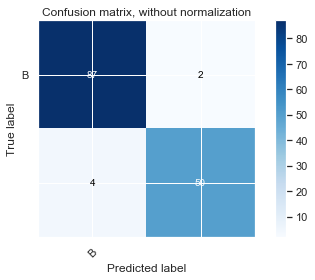

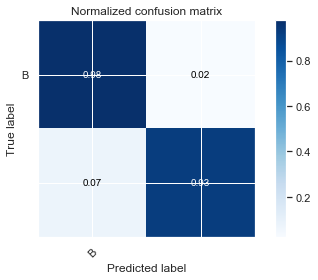

In [24]:
class_names = df['clase'].unique()
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, clf.predict(X_test), classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, clf.predict(X_test), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

### ROC

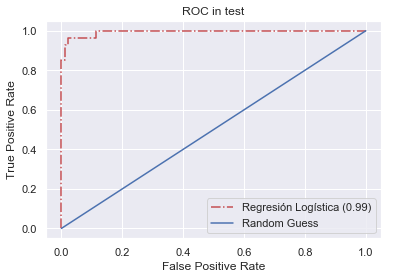

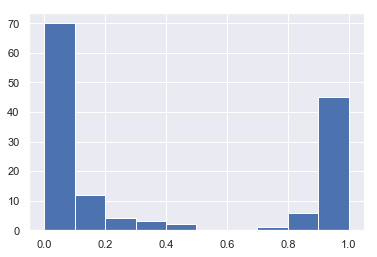

In [25]:
#y_pred_proba = LR_model.predict(X_test_sc)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test) [:,1])

fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'Regresión Logística (%2.2f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC in test')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend()
plt.show()

plt.hist(clf.predict_proba(X_test)[:,1])
plt.show()

## RF

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier( class_weight='balanced').fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### Performace

In [27]:
 clf.score(X_test, y_test)

0.993006993006993

In [28]:
print(classification_report(y_test, clf.predict(X_test) ))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99        89
        True       1.00      0.98      0.99        54

   micro avg       0.99      0.99      0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



### Matiz de Confusión

Confusion matrix, without normalization
[[89  0]
 [ 1 53]]
Normalized confusion matrix
[[1.         0.        ]
 [0.01851852 0.98148148]]


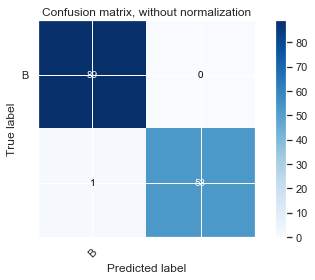

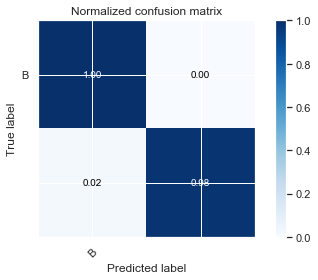

In [29]:
class_names = df['clase'].unique()
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, clf.predict(X_test), classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, clf.predict(X_test), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

### ROC

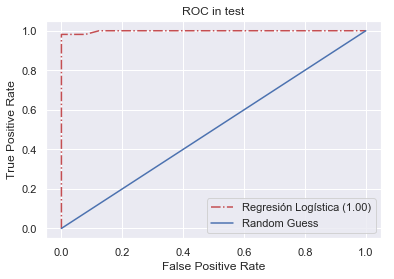

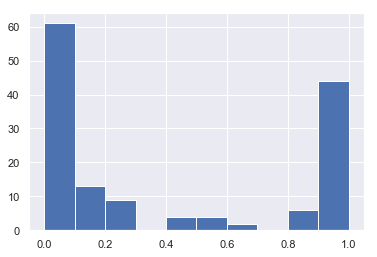

In [30]:
#y_pred_proba = LR_model.predict(X_test_sc)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test) [:,1])

fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'Regresión Logística (%2.2f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC in test')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend()
plt.show()

plt.hist(clf.predict_proba(X_test)[:,1])
plt.show()

## GBM

In [31]:
from sklearn.ensemble import  GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=500, validation_fraction=0.2, n_iter_no_change=5, tol=0.01, random_state=0).fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
clf.n_estimators_

31

### Performace

In [33]:
 clf.score(X_test, y_test)

0.9440559440559441

In [34]:
print(classification_report(y_test, clf.predict(X_test) ))

              precision    recall  f1-score   support

       False       0.97      0.94      0.95        89
        True       0.91      0.94      0.93        54

   micro avg       0.94      0.94      0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



### Matiz de Confusión

Confusion matrix, without normalization
[[84  5]
 [ 3 51]]
Normalized confusion matrix
[[0.94382022 0.05617978]
 [0.05555556 0.94444444]]


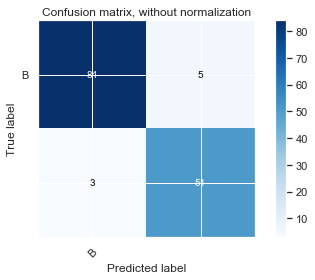

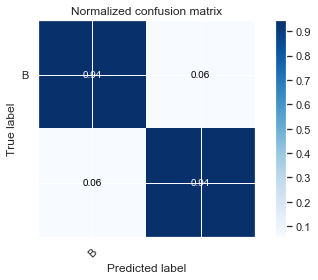

In [35]:
class_names = df['clase'].unique()
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, clf.predict(X_test), classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, clf.predict(X_test), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

### ROC

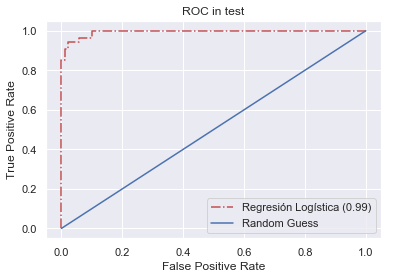

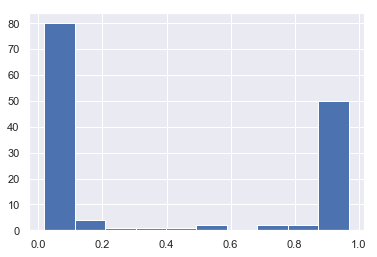

In [36]:
#y_pred_proba = LR_model.predict(X_test_sc)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test) [:,1])

fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'Regresión Logística (%2.2f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC in test')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend()
plt.show()

plt.hist(clf.predict_proba(X_test)[:,1])
plt.show()

## KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### Performace

In [53]:
 clf.score(X_test, y_test)

0.9300699300699301

In [54]:
print(classification_report(y_test, clf.predict(X_test) ))

              precision    recall  f1-score   support

       False       0.94      0.94      0.94        89
        True       0.91      0.91      0.91        54

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



### Matiz de Confusión

Confusion matrix, without normalization
[[84  5]
 [ 5 49]]
Normalized confusion matrix
[[0.94382022 0.05617978]
 [0.09259259 0.90740741]]


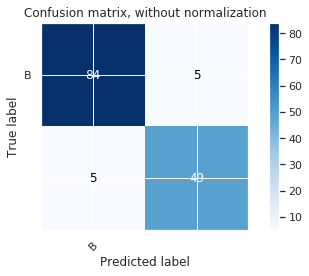

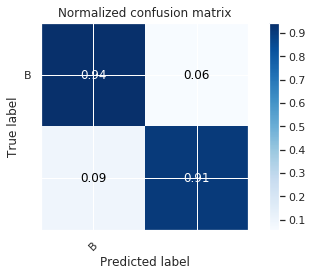

In [55]:
class_names = df['clase'].unique()
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, clf.predict(X_test), classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, clf.predict(X_test), classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

### ROC

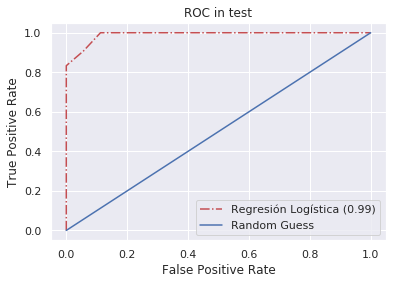

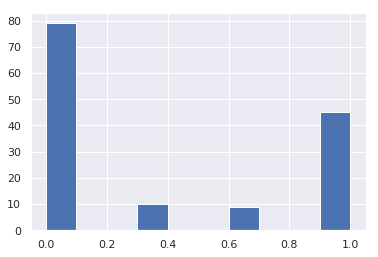

In [56]:
#y_pred_proba = LR_model.predict(X_test_sc)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test) [:,1])

fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'Regresión Logística (%2.2f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC in test')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend()
plt.show()

plt.hist(clf.predict_proba(X_test)[:,1])
plt.show()